In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import kagglegym
with pd.HDFStore("../input/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


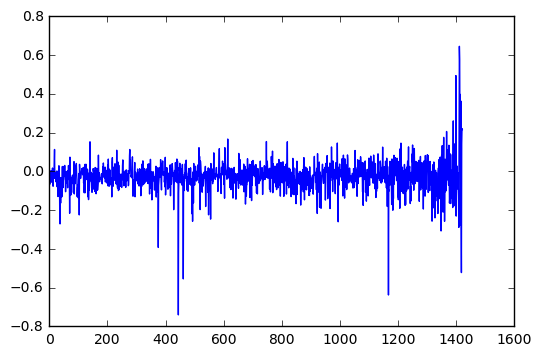

In [4]:
# This computes the autocorrelation of y for all different unique ids, with lag = 1
corrs = zeros(len(df['id'].unique()))
ids = df['id'].unique()
for i in range(len(corrs)):
    corrs[i] = df[df['id'] == ids[i]]['y'].autocorr(lag=1)
plot(corrs)

In [5]:
# Find biggest correlation
for i in range(len(corrs)):
    if corrs[i] != corrs[i]:
        corrs[i] = 0.0
argmin(corrs)

444

In [6]:
# fing all big correlations that are bigger than 0.4
big_corrs = []
for i in range(len(corrs)):
    if abs(corrs[i]) > 0.4:
        big_corrs += [i]
len(big_corrs)
print(ids[big_corrs])

[1276 1314 1056  980  546  752 1726]


In [8]:
# print the lengths of the data that have large correlations
for i in range(len(big_corrs)):
    print(len(df[df['id'] == ids[big_corrs[i]]]))

18
12
8
12
14
14
14


In [9]:
# Find which columns are NaN for these stuff
for i in range(len(big_corrs)):
    print("id at ", ids[big_corrs[i]])
    data = df[df['id'] == ids[big_corrs[i]]]
    cols = data.columns[2:110]
    for j in range(len(cols)):
        all_nan = True
#         print(cols[j], len(data[cols[j]]))
        for k in range(len(data[cols[j]])):
            if (data[cols[j]].values[k] == data[cols[j]].values[k]):
                all_nan = False
                break;
        if all_nan == True:
            print("id", ids[big_corrs[i]], "has column", cols[j], "all nan")
#     print(df[df['id'] == ids[big_corrs[i]]])

id at  1276
id 1276 has column fundamental_1 all nan
id 1276 has column fundamental_3 all nan
id 1276 has column fundamental_5 all nan
id 1276 has column fundamental_6 all nan
id 1276 has column fundamental_9 all nan
id 1276 has column fundamental_17 all nan
id 1276 has column fundamental_22 all nan
id 1276 has column fundamental_24 all nan
id 1276 has column fundamental_25 all nan
id 1276 has column fundamental_26 all nan
id 1276 has column fundamental_27 all nan
id 1276 has column fundamental_28 all nan
id 1276 has column fundamental_31 all nan
id 1276 has column fundamental_35 all nan
id 1276 has column fundamental_38 all nan
id 1276 has column fundamental_47 all nan
id 1276 has column fundamental_49 all nan
id 1276 has column fundamental_57 all nan
id 1276 has column fundamental_61 all nan
id 1276 has column fundamental_63 all nan
id 1276 has column technical_0 all nan
id 1276 has column technical_1 all nan
id 1276 has column technical_3 all nan
id 1276 has column technical_5 all n

In [10]:
# Look at some random ids to see which columns are NaN
for i in range(0,1400,140):
    print("id at ", ids[i])
    data = df[df['id'] == ids[i]]
    cols = data.columns[2:110]
    for j in range(len(cols)):
        all_nan = True
#         print(cols[j], len(data[cols[j]]))
        for k in range(len(data[cols[j]])):
            if (data[cols[j]].values[k] == data[cols[j]].values[k]):
                all_nan = False
                break;
        if all_nan == True:
            print("id", ids[i], "has column", cols[j], "all nan")

id at  10
id 10 has column fundamental_5 all nan
id 10 has column technical_25 all nan
id 10 has column technical_28 all nan
id 10 has column technical_31 all nan
id 10 has column technical_44 all nan
id at  406
id 406 has column derived_0 all nan
id 406 has column derived_1 all nan
id 406 has column derived_2 all nan
id 406 has column derived_3 all nan
id 406 has column derived_4 all nan
id 406 has column fundamental_1 all nan
id 406 has column fundamental_2 all nan
id 406 has column fundamental_3 all nan
id 406 has column fundamental_5 all nan
id 406 has column fundamental_6 all nan
id 406 has column fundamental_7 all nan
id 406 has column fundamental_8 all nan
id 406 has column fundamental_9 all nan
id 406 has column fundamental_11 all nan
id 406 has column fundamental_12 all nan
id 406 has column fundamental_13 all nan
id 406 has column fundamental_14 all nan
id 406 has column fundamental_15 all nan
id 406 has column fundamental_16 all nan
id 406 has column fundamental_17 all nan
i